In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/My Drive/AA_PROJ_2

/content/drive/My Drive/AA_PROJ_2


In [ ]:
import pickle
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from tensorflow.keras.callbacks import TensorBoard
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Conv1D, Dropout, MaxPooling1D, Flatten,Activation,LSTM, BatchNormalization

#Generator

In [ ]:
dict_genres = {'Electronic':0, 'Experimental':1, 'Folk':2, 'Hip-Hop':3, 
               'Instrumental':4,'International':5, 'Pop' :6, 'Rock': 7  }

print(len(dict_genres))

8


In [ ]:

def generate_batch_train(batch_size):
  #print("gen")
  load_counter = 0
  file_counter = 0
  x_pickle_files = ["Pickled_Data/Final/WF/wf_x_train.pickle", "Pickled_Data/Final/SP/wf_x_train.pickle"]
  y_pickle_files = ["Pickled_Data/Final/WF/y.pickle", "Pickled_Data/Final/SP/y.pickle"]
  n_loads = [3,5]
  
  while True:
    #print("while")
    fileNameX = x_pickle_files[file_counter] 
    fileNameY = y_pickle_files[file_counter]
    if load_counter == 0:
      pfileX = open(fileNameX, "rb")
      pfiley = open(fileNameY, "rb")
    #print("load")
    X_train = pickle.load(pfileX)[:990]
    y_train = pickle.load(pfiley)[:990]
    #print("loaded")
 #   print("after padding : file {0} pickle format {1}".format(fileNameX,X_train.shape))
    load_counter += 1
    if load_counter == n_loads[file_counter]:
      load_counter = 0
      file_counter = (file_counter+1) % len(x_pickle_files)

    for cbatch in range(0, X_train.shape[0], batch_size):
      print(np.vectorize(dict_genres.get)(y_train[cbatch:(cbatch + batch_size)]))
      yield (X_train[cbatch:(cbatch + batch_size)], tf.keras.utils.to_categorical( np.vectorize(dict_genres.get)(y_train[cbatch:(cbatch + batch_size)]), num_classes=8) )

In [ ]:

def generate_batch_valid(batch_size_v):
  load_counter_v = 0
  file_counter_v = 0
  x_pickle_files_v = ["Pickled_Data/Final/WF/wf_x_valid.pickle", "Pickled_Data/Final/SP/wf_x_valid.pickle"]
  y_pickle_files_v = ["Pickled_Data/Final/WF/y.pickle", "Pickled_Data/Final/SP/y.pickle"]
  n_loads_v = [3,5]
  
  while True:
    
    fileNameX_v = x_pickle_files_v[file_counter_v] 
    fileNameY_v = y_pickle_files_v[file_counter_v]
    if load_counter_v == 0:
      pfileX_v = open(fileNameX_v, "rb")
      pfiley_v = open(fileNameY_v, "rb")

    X_valid = pickle.load(pfileX_v)[:990]
    y_valid = pickle.load(pfiley_v)[:990]
  
 #   print("after padding : file {0} pickle format {1}".format(fileNameX,X_train.shape))
    load_counter_v += 1
    if load_counter_v == n_loads_v[file_counter_v]:
      load_counter_v = 0
      file_counter_v = (file_counter_v+1) % len(x_pickle_files_v)


    for cbatch_v in range(0, X_valid.shape[0], batch_size_v):
      #print("yielding")
      yield (X_valid[cbatch_v:(cbatch_v + batch_size_v)], tf.keras.utils.to_categorical(np.vectorize(dict_genres.get)(y_valid[cbatch_v:(cbatch_v + batch_size_v)]), num_classes=8) )

In [ ]:

def generate_batch_test(batch_size):
  load_counter = 0
  file_counter = 0
  x_pickle_files = ["Pickled_Data/Final/WF/wf_x_train.pickle", "Pickled_Data/Final/SP/wf_x_train.pickle"]
  y_pickle_files = ["Pickled_Data/Final/WF/y.pickle", "Pickled_Data/Final/SP/y.pickle"]
  n_loads = [3,5]
  
  while True:
    
    fileNameX = x_pickle_files[file_counter] 
    fileNameY = y_pickle_files[file_counter]
    if load_counter == 0:
      pfileX = open(fileNameX, "rb")
      pfiley = open(fileNameY, "rb")

    X_train = pickle.load(pfileX)[:990]
    y_train = pickle.load(pfiley)[:990]
  
 #   print("after padding : file {0} pickle format {1}".format(fileNameX,X_train.shape))
    load_counter += 1
    if load_counter == n_loads[file_counter]:
      load_counter = 0
      file_counter = (file_counter+1) % len(x_pickle_files)

    for cbatch in range(0, X_train.shape[0], batch_size):
      print("yielding")
      yield (X_train[cbatch:(cbatch + batch_size)], y_train[cbatch:(cbatch + batch_size)]


'\ndef generate_batch_test(batch_size):\n  load_counter = 0\n  file_counter = 0\n  x_pickle_files = ["Pickled_Data/Final/WF/wf_x_train.pickle", "Pickled_Data/Final/SP/wf_x_train.pickle"]\n  y_pickle_files = ["Pickled_Data/Final/WF/y.pickle", "Pickled_Data/Final/SP/y.pickle"]\n  n_loads = [3,5]\n  \n  while True:\n    \n    fileNameX = x_pickle_files[file_counter] \n    fileNameY = y_pickle_files[file_counter]\n    if load_counter == 0:\n      pfileX = open(fileNameX, "rb")\n      pfiley = open(fileNameY, "rb")\n\n    X_train = pickle.load(pfileX)[:990]\n    y_train = pickle.load(pfiley)[:990]\n  \n #   print("after padding : file {0} pickle format {1}".format(fileNameX,X_train.shape))\n    load_counter += 1\n    if load_counter == n_loads[file_counter]:\n      load_counter = 0\n      file_counter = (file_counter+1) % len(x_pickle_files)\n\n    for cbatch in range(0, X_train.shape[0], batch_size):\n      print("yielding")\n      yield (X_train[cbatch:(cbatch + batch_size)], y_train[cbat

#See Data


In [ ]:
gen = generate_batch_train(9)
for i in range(0,1000):
  value = next(gen)
  #print("shape of output: x: {0}    y: {1} ".format(value[0].shape,value[1].shape ))
  if(value[0].shape[0]!=9 or value[1].shape[0]!=9 ):
    print("yikes")


In [ ]:
gen = generate_batch_valid(9)
for i in range(0,1):
  value = next(gen)
  #print("shape of output: x: {0}    y: {1} ".format(value[0].shape,value[1].shape ))
  if(value[0].shape[0]!=9 or value[1].shape[0]!=9 ):
    print("yikes")


(198450,)
<class 'numpy.ndarray'>
[ 0.          0.          0.         ... -0.02470758 -0.03938253
 -0.05610237]


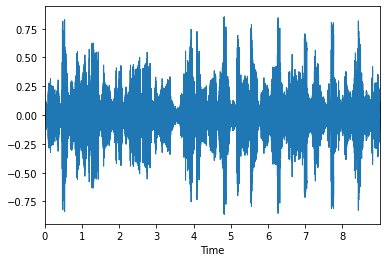

In [ ]:
y1, sr1 = librosa.load("data/FMA/FMA/fma_small/000/000002.mp3", offset=0, duration=9)
librosa.display.waveplot(y1, sr=sr1)
print(y1.shape)
print(type(y1))
print(y1)

ipd.Audio(y1,rate=22050)

In [ ]:
gen = generate_batch_train(9)
value = next(gen)


print(np.vectorize(dict_genres.get)(pickle.load(open('Pickled_Data/Final/WF/y.pickle', "rb"))))

[6 2 2 6 2 7 2 5 7]
[6 2 2 6 2 7 2 5 7 2 7 7 2 5 2 2 2 7 7 2 5 2 2 7 5 2 6 2 6 2 7 7 5 2 2 2 7
 7 2 5 2 2 5 7 2 7 6 2 0 7 7 6 2 2 3 6 1 6 1 3 1 1 1 2 1 3 2 3 1 7 1 1 1 2
 3 1 3 1 6 1 3 3 2 1 7 3 1 6 1 2 0 3 2 2 2 2 1 2 3 2 2 2 2 6 2 2 2 7 2 7 1
 7 1 2 1 2 1 1 5 2 5 3 5 5 0 2 2 5 2 5 7 7 5 5 5 7 5 2 7 5 7 3 5 7 5 5 5 5
 3 0 7 5 7 2 5 5 7 7 5 5 5 0 5 5 3 7 7 5 5 5 5 5 7 7 7 7 2 5 5 7 2 5 5 5 5
 0 5 5 5 7 5 1 1 7 1 1 2 7 7 1 2 7 2 0 7 1 2 6 6 5 1 1 5 6 1 5 1 5 5 2 2 1
 1 2 5 7 6 5 7 1 2 6 7 1 2 6 2 7 2 1 1 1 5 5 7 2 7 1 5 3 5 5 5 2 2 2 3 3 5
 2 5 1 5 3 1 7 5 7 5 2 2 2 7 5 2 5 3 5 5 2 5 5 3 3 5 2 1 5 3 5 1 5 2 5 5 3
 2 7 1 5 5 5 5 3 5 3 5 2 5 3 5 5 5 5 5 1 7 5 5 3 1 6 1 2 5 3 2 1 2 2 2 2 5
 5 2 5 2 1 2 7 2 6 2 2 2 2 5 7 2 2 2 1 5 7 2 1 3 7 3 1 1 7 6 2 7 1 3 2 7 5
 2 6 7 2 2 6 2 5 2 2 7 2 5 7 3 2 1 1 1 7 7 7 1 7 1 7 7 2 1 5 7 1 7 1 2 1 7
 1 7 2 1 1 6 2 2 2 1 7 1 3 7 3 7 1 2 3 6 2 2 2 2 2 2 1 2 7 2 6 3 4 2 3 2 2
 2 7 2 1 3 2 2 6 3 2 5 1 7 6 2 7 1 6 2 7 2 7 2 2 2 1 3 2 2 7 0 2 2 2 3 6 6
 2 6 

#Model


In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape= (198450,1) ,name = "conv1_1"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=32, kernel_size=5, activation='relu', name='conv1_2'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=32, kernel_size=5, activation='relu', name='conv1_3'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=16, kernel_size=3, activation='relu', name='conv1_4'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=8, kernel_size=3, activation='relu', name='conv1_5'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=6, kernel_size=3, activation='relu', name='conv1_6'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax', name='output_realtime'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None, 1)]         0         
_________________________________________________________________
convolution_1 (Conv1D)       (None, None, 56)          336       
_________________________________________________________________
batch_normalization_15 (Batc (None, None, 56)          224       
_________________________________________________________________
activation_15 (Activation)   (None, None, 56)          0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, None, 56)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, None, 56)          0         
_________________________________________________________________
convolution_2 (Conv1D)       (None, None, 56)          1573

In [ ]:
from keras import regularizers
from keras.optimizers import Adam

N_LAYERS = 3
FILTER_LENGTH = 5
CONV_FILTER_COUNT = 56
BATCH_SIZE = 32
LSTM_COUNT = 96
EPOCH_COUNT = 70
NUM_HIDDEN = 64
L2_regularization = 0.001

input_shape = (None, 1)
model_input = Input(input_shape, name='input')

layer = model_input
for i in range(N_LAYERS):
    # give name to the layers
    layer = Conv1D(
            filters=CONV_FILTER_COUNT,
            kernel_size=FILTER_LENGTH,
            kernel_regularizer=regularizers.l2(L2_regularization),  # Tried 0.001
            name='convolution_' + str(i + 1)
        )(layer)
    layer = BatchNormalization(momentum=0.9)(layer)
    layer = Activation('relu')(layer)
    layer = MaxPooling1D(2)(layer)
    layer = Dropout(0.4)(layer)
    
## LSTM Layer
layer = LSTM(LSTM_COUNT, return_sequences=False)(layer)
layer = Dropout(0.4)(layer)

## Dense Layer
layer = Dense(NUM_HIDDEN, kernel_regularizer=regularizers.l2(L2_regularization), name='dense1')(layer)
layer = Dropout(0.4)(layer)

## Softmax Output
layer = Dense(8)(layer)
layer = Activation('softmax', name='output_realtime')(layer)
model_output = layer
model = Model(model_input, model_output)



model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
        )

In [ ]:
x_train = pickle.load(open('Pickled_Data/Final/WF/wf_x_train.pickle', "rb"))[:990]
y_train = tf.keras.utils.to_categorical(np.vectorize(dict_genres.get)(pickle.load(open('Pickled_Data/Final/WF/y.pickle', "rb")))[:990], num_classes=8)

x_val = pickle.load(open('Pickled_Data/Final/WF/wf_x_valid.pickle', "rb"))[:990]


LOGNAME = "first"
log_dir = os.path.join("LogsTests",LOGNAME,"fit",)
tensorboard = TensorBoard(log_dir = log_dir)
print(LOGNAME)
 
BATCH_SIZE = 9
#train_generator = generate_batch_train(BATCH_SIZE)
#val_generator = generate_batch_valid(BATCH_SIZE)

model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=20,
                        validation_data=(x_val, y_train))

'''
model.fit_generator(train_generator,
                    steps_per_epoch=(990*8) // BATCH_SIZE,
                    epochs=200,
                    validation_data=val_generator,
                    validation_steps=(990*8) // BATCH_SIZE,
                    callbacks=[tensorboard])
'''

first
Epoch 1/20
110/110 [==============================] - 148s 1s/step - loss: 2.2785 - accuracy: 0.1788 - val_loss: 2.1582 - val_accuracy: 0.1939
Epoch 2/20
110/110 [==============================] - 146s 1s/step - loss: 2.1897 - accuracy: 0.1909 - val_loss: 2.1146 - val_accuracy: 0.2475
Epoch 3/20
110/110 [==============================] - 148s 1s/step - loss: 2.1539 - accuracy: 0.2111 - val_loss: 2.1007 - val_accuracy: 0.2333
Epoch 4/20
110/110 [==============================] - 146s 1s/step - loss: 2.1453 - accuracy: 0.2030 - val_loss: 2.0804 - val_accuracy: 0.2545
Epoch 5/20
110/110 [==============================] - 145s 1s/step - loss: 2.1080 - accuracy: 0.2384 - val_loss: 2.0672 - val_accuracy: 0.2475
Epoch 6/20
110/110 [==============================] - 144s 1s/step - loss: 2.0903 - accuracy: 0.2152 - val_loss: 2.0670 - val_accuracy: 0.2434
Epoch 7/20
 30/110 [=======>......................] - ETA: 1:12 - loss: 2.1238 - accuracy: 0.2259